<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/Etivity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etivity 2

The goal of this lab is to prepare a dataset for a machine learning algorithm.   There are a number of procedures needed on the data set to complete this.

These include:


*   Performing a visual EDA on the dataset to get a visual feel for the data being treated.  Is there any glaring parts of the data missing or inconsistent (e.g. more than one piece of information per cell or large amounts of missing cells of data in a column).  This was done in excel and the dataset visually appears ok.  A diff shows it is an identical dataset to Etivity1.

## Filling the blank numeric data cells
I am taking a three step path to filling in the missing data.
1) Ensure the existing data is within an expected range.
This was done with the EDA in Excel and the df.describe() function.
2) Determine the missing data and analysis it for the next step.
This was done using df.isna().sum() and we can see that the missing fields are with :
- age (12)
- education (104)
- contact (191)
- poutcome(494)

3) With the missing data, we need to decide whether to delete the rows containing the missing data or to 'fill in' the missing data.  This will depend on each field.

Age field could be attempted to be filled out using an algorithm utilising mean values.
Education needs more consideration as there are 104 missing.  However, keeping the same % of primary, secondary and third level counts and filling in the 104 values may work.  Also deleting the rows may be ok as it is only 5% of the data.

## Features I intend to use
In order to fill missing numericial data, I expect to use a library like scikit-learn library or xgboost or a simple mean determination algorithm.  I will need to understand their pros and cons first.

I expect to test my final dataset for the ML stage by using a set of asserts as tests to ensure the final dataset is integral.

I expect to consider the use of pipelines to fill in missing data, once I understand their operation fully.

I expect to look at mapping text values to numerical values using the map feature.

I expect to identify and treat any outliers in the data as per the example in the lab2 notebook.


A describe() call is used to check the ranges of numerical fields.



In [0]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sort=True

url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/bank.csv'
df = pd.read_csv(url_train)

In [853]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


### Observation
Ages appear to be in range as does balance the the other numeric fields.  pdays = -1 is one item that sticks out but there is an explanation for this.

# Data Cleaning Action
A careful and considered approach to data cleaning is paramount.  Any ignorant and unwise decision can result in introducing unintended information into the data or to altering an important pattern.

## Missing values
We will first consider missing data values
Using a number of techniques we will find missing or unexpected data in columns or features.

1.  Finding Nan and nulls shows
age, job, education, contact and poutcome as having missing data.
2.  A visual examination of the columns shows that:
the rest of the columns contain no empty values
duration has a number of  values quite high - perhaps consideration if duration is > 365, we should disregard
pdays has a -1 value
poutcome has a large amount of other and blank values as well as success/failure




In [854]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [855]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

## Data filling

As there are few age values missing compared to the number of rows, it is good enough to fill them in with the median value for age as it is a small dataset.  The boundary ages are as within reason.

The substitution is done here and a test shows it is ok

In [856]:
print (df['age'])
meanAge = round(df['age'].mean(), 0)
print (meanAge)
medianAge = round(df['age'].median(), 0)
print (medianAge)

df['age'].fillna(meanAge, inplace=True)
df.isna().sum()


0       32.0
1       39.0
2       59.0
3       47.0
4       54.0
        ... 
1995    20.0
1996    28.0
1997    81.0
1998    46.0
1999    40.0
Name: age, Length: 2000, dtype: float64
42.0
38.0


age             0
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Next we delete the rows with no job.  This 10 out of 2000 rows, so this is a straightforward decision.  Test runs after to check out new dataframe


In [857]:
df = df.dropna(subset=['job'])

df.isna().sum()

age             0
job             0
marital         0
education      99
default         0
balance         0
housing         0
loan            0
contact       190
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      451
subscribed      0
dtype: int64

In [858]:
df.shape

(1990, 17)

### The education, contact and poutcome columns 
These are more of concern as there are a considerable number of missing values.

For education, we will get the value counts for each education type and then populate based on the ratio




In [859]:
vc = df['education'].value_counts(normalize=True)
vc

secondary    0.525119
tertiary     0.361185
primary      0.113696
Name: education, dtype: float64

This means, we can populate the missing 99 values with this ratio
11:36:52

In [860]:

dfs = (df['education'].value_counts().to_frame().reset_index()).sort_values('education', ascending=False)
dfs

,index,education
0,secondary,993
1,tertiary,683
2,primary,215


In [861]:

df['education'].fillna('secondary', limit=53, inplace=True)
df['education'].fillna('tertiary', limit=36, inplace=True)
df['education'].fillna('primary', inplace=True)
df.isna().sum()





age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact       190
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      451
subscribed      0
dtype: int64

We do the same for contact missing values


In [862]:
vc = df['contact'].value_counts(normalize=True)
vc

cellular     0.919444
telephone    0.080556
Name: contact, dtype: float64

In [863]:
df['contact'].fillna('cellular', limit=175, inplace=True)
df['contact'].fillna('telephone', limit=15, inplace=True)
df.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      451
subscribed      0
dtype: int64

We know that poutcome is success, failure or other.
The blanks are set to 'unknown' as this is the only option available.  There are too many to ignore


In [864]:
df['poutcome'].fillna('unknown', inplace=True)
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Encoding
Nominal categorical data can be encoded to numerical data without adding any new information into the dataset.

marital values are changes from text to 0, 1 and 2.
To test the encoding, the value_counts() function is used.


In [865]:
df['marital_1'] = pd.factorize(df.marital)[0]
df.marital_1.value_counts()


2    1105
0     670
1     215
Name: marital_1, dtype: int64

### One Hot Encoding
Is a better way to encode which will not introduce an order to the numbers (0,1,2) which can be interpreted by a machine algorithm as having order.  So, insteat we create seperate columns and merge back to the dataset, deleting the original column

In [866]:
new = pd.get_dummies(df.marital)
new.head()


,divorced,married,single
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [867]:
merged = pd.concat([df, new], axis='columns')
del merged['marital']
del merged['marital_1']
merged.head()

,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,divorced,married,single
0,32.0,technician,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,0,0,1
1,39.0,technician,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,1,0,0
2,59.0,retired,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no,0,1,0
3,47.0,blue-collar,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no,0,1,0
4,54.0,retired,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no,0,1,0


### Multi-Collinear columns
To prevent issues with the newly created columns with the machine learning algorithms, we drop one of the three new columns as it can be derived from the other two columns

Here we drop 'single'

In [868]:
del merged['single']
df = merged
df.head()


,age,job,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,divorced,married
0,32.0,technician,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,0,0
1,39.0,technician,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,1,0
2,59.0,retired,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no,0,1
3,47.0,blue-collar,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no,0,1
4,54.0,retired,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no,0,1


We repeat this One Hot Encoding for the other Nominal categorical columns


In [869]:
new = pd.get_dummies(df.job)
merged = pd.concat([df, new], axis='columns')
del merged['job']
del merged['unemployed']
df = merged
df

,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician
0,32.0,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,0,0,0,0,0,0,0,0,0,0,0,1
1,39.0,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,1,0,0,0,0,0,0,0,0,0,0,1
2,59.0,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0
3,47.0,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no,0,1,0,1,0,0,0,0,0,0,0,0
4,54.0,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,primary,no,2785,no,no,cellular,16,sep,327,2,-1,0,unknown,yes,0,0,0,0,0,0,0,0,0,0,1,0
1996,28.0,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,unknown,yes,0,0,1,0,0,0,0,0,0,0,0,0
1997,81.0,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,unknown,yes,0,1,0,0,0,0,0,1,0,0,0,0
1998,46.0,primary,no,4343,yes,no,telephone,20,sep,185,1,-1,0,unknown,yes,0,1,0,0,0,0,0,0,0,1,0,0


In [870]:
new = pd.get_dummies(df.default)
merged = pd.concat([df, new], axis='columns')
del merged['default']
del merged['no']
merged.rename(columns={'yes': 'default'}, inplace=True)
merged
df = merged
df

,age,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default
0,32.0,tertiary,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,0,0,0,0,0,0,0,0,0,0,0,1,0
1,39.0,secondary,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,1,0,0,0,0,0,0,0,0,0,0,1,0
2,59.0,secondary,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0,0
3,47.0,secondary,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no,0,1,0,1,0,0,0,0,0,0,0,0,0
4,54.0,secondary,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,primary,2785,no,no,cellular,16,sep,327,2,-1,0,unknown,yes,0,0,0,0,0,0,0,0,0,0,1,0,0
1996,28.0,secondary,127,no,no,cellular,16,sep,1334,2,-1,0,unknown,yes,0,0,1,0,0,0,0,0,0,0,0,0,0
1997,81.0,primary,1154,no,no,telephone,17,sep,231,1,-1,0,unknown,yes,0,1,0,0,0,0,0,1,0,0,0,0,0
1998,46.0,primary,4343,yes,no,telephone,20,sep,185,1,-1,0,unknown,yes,0,1,0,0,0,0,0,0,0,1,0,0,0


In [871]:
new = pd.get_dummies(df.housing)
merged = pd.concat([df, new], axis='columns')
del merged['housing']
del merged['no']
merged.rename(columns={'yes': 'housing'}, inplace=True)
df = merged 
df

,age,education,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing
0,32.0,tertiary,392,no,cellular,1,apr,957,2,131,2,failure,no,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,39.0,secondary,688,yes,cellular,1,apr,233,2,133,1,failure,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,59.0,secondary,1035,yes,cellular,1,apr,126,2,239,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,47.0,secondary,398,yes,cellular,1,apr,274,1,238,2,failure,no,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,54.0,secondary,1004,no,cellular,1,apr,479,1,307,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,primary,2785,no,cellular,16,sep,327,2,-1,0,unknown,yes,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1996,28.0,secondary,127,no,cellular,16,sep,1334,2,-1,0,unknown,yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1997,81.0,primary,1154,no,telephone,17,sep,231,1,-1,0,unknown,yes,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1998,46.0,primary,4343,no,telephone,20,sep,185,1,-1,0,unknown,yes,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [872]:
new = pd.get_dummies(df.loan)
merged = pd.concat([df, new], axis='columns')
del merged['loan']
del merged['no']
merged.rename(columns={'yes': 'loan'}, inplace=True)
df = merged 
df

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan
0,32.0,tertiary,392,cellular,1,apr,957,2,131,2,failure,no,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,39.0,secondary,688,cellular,1,apr,233,2,133,1,failure,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1
2,59.0,secondary,1035,cellular,1,apr,126,2,239,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1
3,47.0,secondary,398,cellular,1,apr,274,1,238,2,failure,no,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
4,54.0,secondary,1004,cellular,1,apr,479,1,307,1,failure,no,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,primary,2785,cellular,16,sep,327,2,-1,0,unknown,yes,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1996,28.0,secondary,127,cellular,16,sep,1334,2,-1,0,unknown,yes,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1997,81.0,primary,1154,telephone,17,sep,231,1,-1,0,unknown,yes,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1998,46.0,primary,4343,telephone,20,sep,185,1,-1,0,unknown,yes,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [873]:
new = pd.get_dummies(df.subscribed)
merged = pd.concat([df, new], axis='columns')
del merged['subscribed']
del merged['no']
merged.rename(columns={'yes': 'subscribed'}, inplace=True)
merged
df = merged
df

,age,education,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed
0,32.0,tertiary,392,cellular,1,apr,957,2,131,2,failure,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,39.0,secondary,688,cellular,1,apr,233,2,133,1,failure,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
2,59.0,secondary,1035,cellular,1,apr,126,2,239,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,47.0,secondary,398,cellular,1,apr,274,1,238,2,failure,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,54.0,secondary,1004,cellular,1,apr,479,1,307,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,primary,2785,cellular,16,sep,327,2,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1996,28.0,secondary,127,cellular,16,sep,1334,2,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1997,81.0,primary,1154,telephone,17,sep,231,1,-1,0,unknown,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1998,46.0,primary,4343,telephone,20,sep,185,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1


### We now encode our education and contact data


In [874]:
new = pd.get_dummies(df.education)
merged = pd.concat([df, new], axis='columns')
del merged['education']
del merged['primary']
df = merged 
df

,age,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed,secondary,tertiary
0,32.0,392,cellular,1,apr,957,2,131,2,failure,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,39.0,688,cellular,1,apr,233,2,133,1,failure,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,59.0,1035,cellular,1,apr,126,2,239,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
3,47.0,398,cellular,1,apr,274,1,238,2,failure,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
4,54.0,1004,cellular,1,apr,479,1,307,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,2785,cellular,16,sep,327,2,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1996,28.0,127,cellular,16,sep,1334,2,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1997,81.0,1154,telephone,17,sep,231,1,-1,0,unknown,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1998,46.0,4343,telephone,20,sep,185,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [875]:
new = pd.get_dummies(df.contact)
merged = pd.concat([df, new], axis='columns')
del merged['contact']
del merged['telephone']
df = merged 
df

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed,secondary,tertiary,cellular
0,32.0,392,1,apr,957,2,131,2,failure,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
1,39.0,688,1,apr,233,2,133,1,failure,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1
2,59.0,1035,1,apr,126,2,239,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1
3,47.0,398,1,apr,274,1,238,2,failure,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
4,54.0,1004,1,apr,479,1,307,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,2785,16,sep,327,2,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1996,28.0,127,16,sep,1334,2,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1997,81.0,1154,17,sep,231,1,-1,0,unknown,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1998,46.0,4343,20,sep,185,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


## Mapping months
d = {'jan':1, 'feb':2, 'mar':3, 'apr':4, }, etc

In [876]:
monint = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':7, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
df.month = df.month.map(monint)
df

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed,secondary,tertiary,cellular
0,32.0,392,1,4,957,2,131,2,failure,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1
1,39.0,688,1,4,233,2,133,1,failure,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1
2,59.0,1035,1,4,126,2,239,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1
3,47.0,398,1,4,274,1,238,2,failure,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
4,54.0,1004,1,4,479,1,307,1,failure,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,2785,16,9,327,2,-1,0,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1996,28.0,127,16,9,1334,2,-1,0,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
1997,81.0,1154,17,9,231,1,-1,0,unknown,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1998,46.0,4343,20,9,185,1,-1,0,unknown,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


### Encoding poutcome and treating pdays = -1
We encode poutcome and set pdays = 0 where pdays = -1



In [877]:
new = pd.get_dummies(df.poutcome)
merged = pd.concat([df, new], axis='columns')
merged.rename(columns={'success': 'poutcome_success'}, inplace=True)
merged.rename(columns={'failure': 'poutcome_failure'}, inplace=True)
merged.rename(columns={'other': 'poutcome_other'}, inplace=True)
del merged['poutcome']
del merged['unknown']
df = merged 
df

,age,balance,day,month,duration,campaign,pdays,previous,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed,secondary,tertiary,cellular,poutcome_failure,poutcome_other,poutcome_success
0,32.0,392,1,4,957,2,131,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0
1,39.0,688,1,4,233,2,133,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0
2,59.0,1035,1,4,126,2,239,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0
3,47.0,398,1,4,274,1,238,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0
4,54.0,1004,1,4,479,1,307,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,2785,16,9,327,2,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1996,28.0,127,16,9,1334,2,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0
1997,81.0,1154,17,9,231,1,-1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1998,46.0,4343,20,9,185,1,-1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


In [878]:
df.loc[df['pdays'] == -1] = 0
df.describe()

,age,balance,day,month,duration,campaign,pdays,previous,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed,secondary,tertiary,cellular,poutcome_failure,poutcome_other,poutcome_success
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.00000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,32.819095,1128.681407,10.979397,3.771859,213.914573,1.505528,168.009548,2.564322,0.085427,0.447236,0.096482,0.11206,0.016583,0.013568,0.187940,0.063317,0.026131,0.062312,0.030151,0.137186,0.005528,0.387437,0.109548,0.355276,0.412563,0.278894,0.711558,0.477889,0.073869,0.221608
std,20.900599,2949.384871,10.791179,3.580604,215.519678,1.490955,130.898075,3.405794,0.279587,0.497333,0.295326,0.31552,0.127735,0.115717,0.390762,0.243593,0.159564,0.241781,0.171045,0.344130,0.074161,0.487287,0.312404,0.478717,0.492419,0.448568,0.453152,0.499636,0.261624,0.415433
min,0.000000,-980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.250000,0.000000,2.000000,1.000000,44.250000,1.000000,76.250000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,356.000000,6.000000,2.000000,175.000000,1.000000,182.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,1221.500000,20.000000,7.000000,303.750000,2.000000,251.000000,3.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,93.000000,81204.000000,31.000000,12.000000,1823.000000,11.000000,854.000000,55.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Outliers
Using boxplotting and the describe information, we can detect outliers


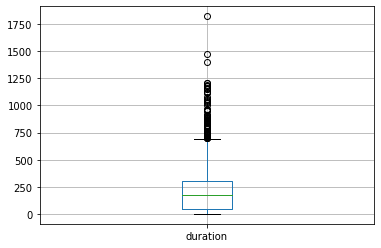

In [879]:
df.boxplot(column=['duration'])
plt.show()

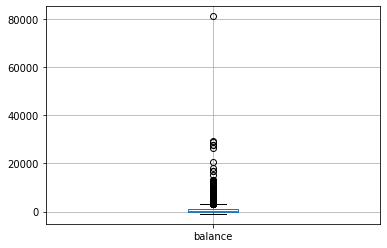

In [880]:
df.boxplot(column=['balance'])
plt.show()

## Remove outlier data
We can use a logic argument to remove outliers in balance and previous columns

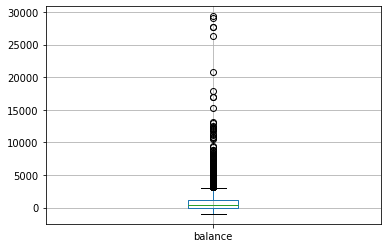

In [881]:
indexNames = df[ df['balance'] > 40000 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.boxplot(column=['balance'])
plt.show()


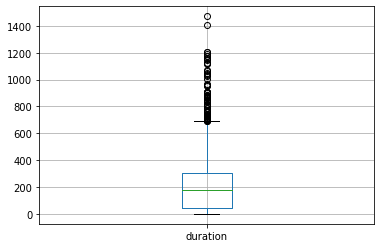

In [882]:
indexNames = df[ df['duration'] > 1500 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

df.boxplot(column=['duration'])
plt.show()

In [883]:
df.describe()

,age,balance,day,month,duration,campaign,pdays,previous,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed,secondary,tertiary,cellular,poutcome_failure,poutcome_other,poutcome_success
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000
mean,32.780684,1088.969819,10.987425,3.772636,213.016600,1.506036,168.028169,2.564889,0.085513,0.446680,0.096579,0.112173,0.016600,0.013581,0.188129,0.062877,0.026157,0.062374,0.030181,0.136821,0.005533,0.387324,0.109658,0.355131,0.411972,0.279175,0.711771,0.477867,0.073944,0.221328
std,20.871891,2340.599094,10.793451,3.582181,212.546525,1.491619,130.950780,3.407312,0.279714,0.497274,0.295459,0.315659,0.127798,0.115775,0.390913,0.242803,0.159642,0.241895,0.171128,0.343745,0.074198,0.487261,0.312542,0.478673,0.492314,0.448707,0.453052,0.499636,0.261745,0.415245
min,0.000000,-980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,2.000000,1.000000,44.000000,1.000000,75.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,356.000000,6.000000,2.000000,175.000000,1.000000,182.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,1220.500000,20.000000,7.000000,303.000000,2.000000,251.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,93.000000,29340.000000,31.000000,12.000000,1472.000000,11.000000,854.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Rescaling
We can rescale a number of columns to be normalised.  
For example, we can rescale age, balance, day, month, duration, campaign, pdays, previous dividing by the max value in each case


In [884]:
df[['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']] /= df[['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']].max()
df

,age,balance,day,month,duration,campaign,pdays,previous,divorced,married,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,default,housing,loan,subscribed,secondary,tertiary,cellular,poutcome_failure,poutcome_other,poutcome_success
0,0.344086,0.013361,0.032258,0.333333,0.650136,0.181818,0.153396,0.036364,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0
1,0.419355,0.023449,0.032258,0.333333,0.158288,0.181818,0.155738,0.018182,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,0
2,0.634409,0.035276,0.032258,0.333333,0.085598,0.181818,0.279859,0.018182,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,0
3,0.505376,0.013565,0.032258,0.333333,0.186141,0.090909,0.278689,0.036364,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0
4,0.580645,0.034219,0.032258,0.333333,0.325408,0.090909,0.359485,0.018182,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Creating a new feature
This can be done by merging, which was done with concat() see above

# Conclusion
That's about it.  The above data set was visually examined and EDA used for sanity checking.

Missing values were filled in by a range of sensible decisions based on the data missing.

Nominal categorical data was encoded and multi-columnar issues were treated.

Outliers were discovered and removed

Mapping was carried out on columns which needed it such as month

Rescaling and normalisation was completed on remaining numerical columns to produce the final dataset.



In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1999
Data columns (total 30 columns):
age                 1988 non-null float64
balance             1988 non-null float64
day                 1988 non-null float64
month               1988 non-null float64
duration            1988 non-null float64
campaign            1988 non-null float64
pdays               1988 non-null float64
previous            1988 non-null float64
divorced            1988 non-null int64
married             1988 non-null int64
admin.              1988 non-null int64
blue-collar         1988 non-null int64
entrepreneur        1988 non-null int64
housemaid           1988 non-null int64
management          1988 non-null int64
retired             1988 non-null int64
self-employed       1988 non-null int64
services            1988 non-null int64
student             1988 non-null int64
technician          1988 non-null int64
default             1988 non-null int64
housing             1988 non-null int